# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [15]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [17]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html=browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [18]:
# Create a Beautiful Soup Object
html_soup=soup(html,  'html.parser')

In [9]:
# Extract all rows of data
# Find the table in the html
#table = html_soup.find('table')

# Find all rows in the table
#rows = table.find_all('tr')

# Loop through each row
#for row in rows:
    # Find all columns in the row
    #columns = row.find_all('td')

    # we next have to retreive the text from each column
    #column_texts = [col.get_text() for col in columns]

    # Print the columns text
    #print(column_texts)

rows = html_soup.find_all('tr', class_="data-row")



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
# Create an empty list
list_of_rows= []
# Loop through the scraped data to create a list of rows
#for data in table:
    # Create a dictionary for each row of data
    #row_dict = {
        #'id': data.find('id'),
        #'terrestrial_date': data.find('terrestrial_date'),  
        #'sol': data.find('sol'),
        #'ls': data.find('ls'),  
        #'month': data.find('month'), 
        #'min_temp': data.find('min_temp'), 
        #'pressure': data.find('pressure'),


    # Append the dictionary to the list
    #list_of_rows.append(row_dict)

for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    list_of_rows.append(row)

In [29]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(list_of_rows, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [30]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [32]:
# Examine data type of each column

# Now let's look at the data types again
print(df.dtypes)  


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [33]:
# Change data types for data analysis
# Convert 'id' to int
df['id'] = df['id'].astype(int)

# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol' to int
df['sol'] = df['sol'].astype(int)

# 'ls' seems to be a string that represents a float. Convert it to float
df['ls'] = df['ls'].astype(float)




# Convert 'min_temp' to int
df['min_temp'] = df['min_temp'].astype(float)

# Convert 'pressure' to float
df['pressure'] = df['pressure'].astype(float)

print(df.dtypes)  

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                       object
min_temp                   float64
pressure                   float64
dtype: object


In [35]:
# Confirm type changes were successful by examining data types again
# Now let's look at the data types again
print(df.dtypes)


id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [36]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f'There are {num_months} unique months in this particular dataset.')


There are 12 unique months in this particular dataset.


In [37]:
# 2. How many Martian days' worth of data are there?
num_sols = df['sol'].nunique()
print(f'There are {num_sols} unique Martian days in the dataset presented.')


There are 1867 unique Martian days in the dataset presented.


In [43]:
# 3. What is the average low temperature by month?
avg_min_temps = df.groupby('month')['min_temp'].mean()


print(avg_min_temps)

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


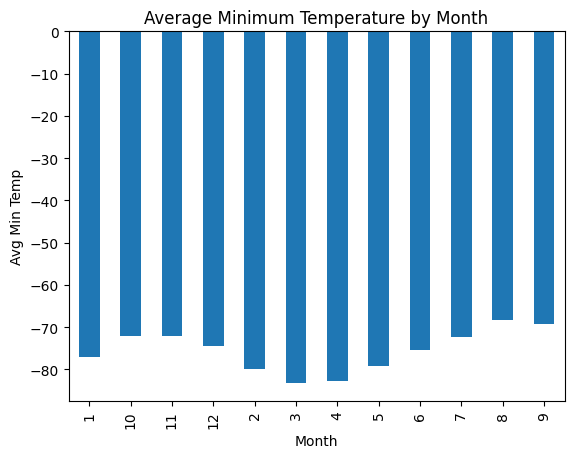

In [40]:
# Plot the average temperature by month
avg_min_temps.plot(kind='bar', title='Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Avg Min Temp')
plt.show()

In [46]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = avg_min_temps.idxmin()
warmest_month = avg_min_temps.idxmax()

print(coldest_month)
print(warmest_month)


3
8


In [41]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby('month')['pressure'].mean()
lowest_pressure_month = avg_pressure.idxmin()
highest_pressure_month = avg_pressure.idxmax()


print(avg_pressure)

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


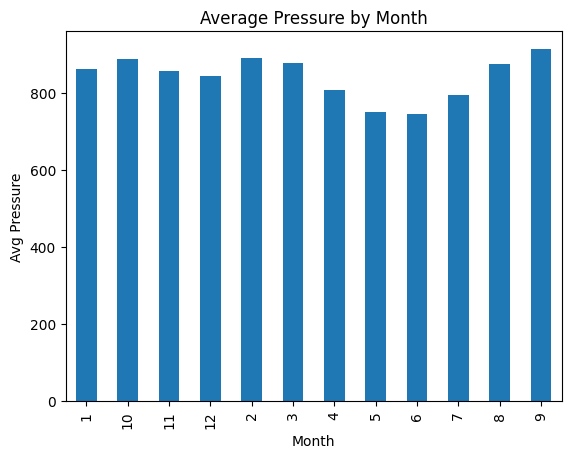

In [42]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', title='Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Avg Pressure')
plt.show()

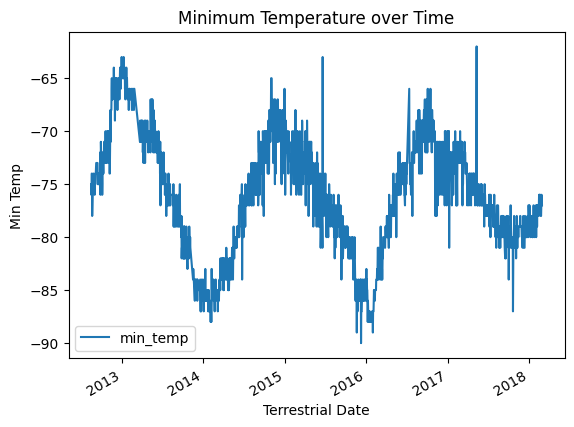

In [47]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df.plot(x='terrestrial_date', y='min_temp')
plt.xlabel('Terrestrial Date')
plt.ylabel('Min Temp')
plt.title('Minimum Temperature over Time')
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [48]:
# Write the data to a CSV

df.to_csv('mars_weather.csv', index=False)


In [49]:
browser.quit()